In [2]:
import kdshmap as kd
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Hamiltonian definition

In [3]:
# Transmon parameters
tmon_dim = 2  # transmon truncation dimension
wq = 4 * 2*np.pi  # transmon frequency
alpha = -0.3 * 2*np.pi  # transmon anharmonicity
    
# A TLS as the noise source
wt = 3.85 * 2*np.pi
g = 0.01*2*np.pi
gamma = 0.05*2*np.pi
f_list = np.linspace(-10, 10, 2001)
Sf_list = gamma/((gamma/2)**2+(f_list-wt/2/np.pi)**2*4*np.pi**2) * g**2
Sf_list += 1 * np.ones(2001) * 0.002


In [4]:
# Transmon Hamiltonian
H = (q.num(tmon_dim)*wq + alpha * (q.num(tmon_dim)*(q.num(tmon_dim)-1)/2))
n = q.destroy(tmon_dim)+q.create(tmon_dim)
t_list_full = np.linspace(0, 200, 50001)
env = np.exp(-(t_list_full-t_list_full[-1]/2)**2/(t_list_full[-1]/2)**2)
env = env - np.min(env)
drive_list = 2*np.pi*0.3*np.cos((wq+0.00)*t_list_full) * env
H = [H, [n, q.interpolate.Cubic_Spline(0, t_list_full[-1], drive_list)]]

In [10]:
# kdshsolver
t_list = np.linspace(0, 1000, 1001)
minimal_step = 1/100

solver = kd.KeldyshSolver(H, t_list, minimal_step, [n],
                          [f_list], [Sf_list], trunc_freq=[(-5, 5)], density0=q.basis(tmon_dim, 1)*q.basis(tmon_dim, 1).dag(),
                          e_ops=[q.basis(tmon_dim, 1)*q.basis(tmon_dim, 1).dag()], method='trapz', goal='expect')

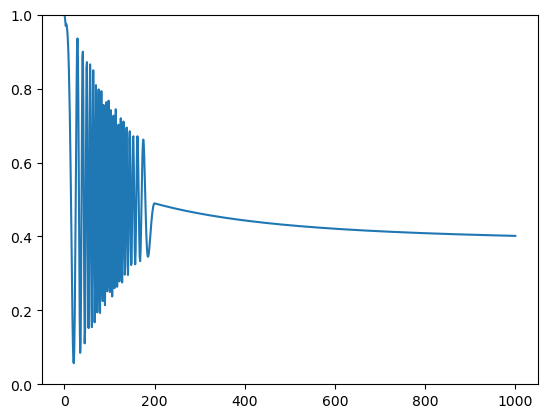

In [11]:
plt.plot(t_list, solver.expect[0].real)
plt.ylim(0.0, 1)
plt.show()

# Functions

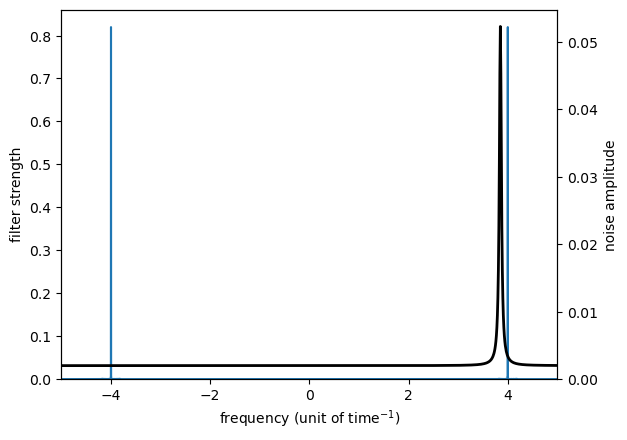

In [12]:
ax = solver.plot_filter_Sf()

In [8]:
solver.generate_error_final()

0.5330710309494241

In [9]:
solver.generate_density_final()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[0.51052226+6.23005695e-18j 0.24146711+1.49985011e-01j]
 [0.24146711-1.49985011e-01j 0.48947758+5.86014839e-18j]]